In [108]:
## 2.1 Feature Normalization
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
### Assignment Owner: Lu Yin

#######################################
#### Normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test  - test set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization
        test_normalized  - test set after normalization

    """
    # TODO
    train_max = train.max(axis = 0) #A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1).
    train_min = train.min(axis = 0)
    col = (train_min != train_max) # make sure only those features with Max and Min are selected in the dat
    train = train[:,col] #select all the rows with the selected column.
    test = test[:,col]
    train_max = train_max[col]
    train_min = train_min[col]
    dis = train_max - train_min # distance between max and min
    train_normalized = (train - train_min)/dis
    test_normalized = (test - train_min)/dis
    return train_normalized, test_normalized
###

# 2.2-1~4

# 2.2-5

In [109]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the square loss for predicting y with X*theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the square loss, scalar
    """
    loss = 0 #initialize the square_loss
    #TODO
    
    N = y.shape[0] # find the size of the sample
    loss = (np.dot(X,theta) - y)**2 # the square loss
    f_loss = np.sum(loss)/N
    return f_loss

In [110]:
#Create a small dataset
size = X_train.shape[1]
theta = np.random.rand(size)
print('The square loss is', compute_square_loss(X_train,y_train,theta))

The square loss is 211.508041305


# 2.2-6

In [111]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute gradient of the square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    m = y.shape[0]
    grad = np.dot(X.T,2*(np.dot(X,theta)-y))/m
    return grad


The gradient of the square loss 

∇L(w;x,y)=∇g(w)∇f(z)=Xt⋅2z/N=Xt⋅2(y−Xw)/N

In [112]:
 # Create a small dataset
x = np.transpose(np.matrix('1,2,3,4,5,6'))
y = np.transpose(np.matrix('0,1,3,5,4,7'))
theta = 1
compute_square_loss_gradient(x,y,theta)

matrix([[-0.66666667]])

The gradient of the square loss is (1*(1-0)+2*(2-1)+0+4*(4-5)+5*(5-4)+6*(6-7))*2/6  = -0.66667

# 2.3 Gradient Checker(Optinal)

In [113]:
###########################################
### Gradient Checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm.  Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):

    true_gradient = compute_square_loss_gradient(X, y, theta)# this is the true gradient that calculated
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #initialize approximate gradient.
    
    #TODO
    for i in range(num_features):
        e = np.zeros(num_features)
        e[i] = 1 # set the selected direction to 1 
        # this is the coordinate direction of each dimension. 
        
        dis = 2*epsilon
        approx_grad[i]=(compute_square_loss(X,y,theta+epsilon*e[i])-
                        compute_square_loss(X,y,theta-epsilon*e[i]))/dis
    error = np.linalg.norm(true_gradient-approx_grad) # Euclidean Distance
    return (error<tolerance)

In [114]:
#################################################
### Generic Gradient Checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. And check whether gradient_func(X, y, theta) returned
    the true gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO
    true_gradient = gradient_func(X, y, theta)
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) # initialize
    
    for i in range(num_features):
        e = np.zeros(num_features)
        e[i] = 1
        # set the selected direction to 1 
        # this is the coordinate direction of each dimension.
        dis = 2*epsilon # distance of 2 epsilon
        appox_grad[i]=(objective_func(X,y,theta+epsilon*e[i])-
                        objective_func(X,y,theta-epsilon*e[i]))/dis
    error = np.linalg.norm(true_gradient-approx_grad) 
    #This function is able to return one of eight different matrix norms, or one of an infinite number of vector norms 
    #(described below), depending on the value of the ord parameter.
    return (error<tolerance)    

The gradient checker makes sure the approximation is good. 

# 2.4-1

In [115]:
####################################
#### Batch Gradient Descent
def batch_grad_descent(X, y, alpha=0.1, num_iter=1000, check_gradient=False):
    """
    In this question you will implement batch gradient descent to
    minimize the square loss objective

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_iter - number of iterations to run
        check_gradient - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - store the the history of parameter vector in iteration, 2D numpy array of size (num_iter+1, num_features)
                    for instance, theta in iteration 0 should be theta_hist[0], theta in ieration (num_iter) is theta_hist[-1]
        loss_hist - the history of objective function vector, 1D numpy array of size (num_iter+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #initialize theta
    loss_hist = compute_square_loss(X,y,theta.T) #initialize loss_hist
    #TODO
    theta_hist = theta
    for i in range(num_iter): # iterations to run
        grad = compute_square_loss_gradient(X,y,theta.T)
        theta = theta - alpha*grad.T #step size in gradient decent * grad
#       theta_hist = np.concatenate((theta_hist,theta), axis = 0) # theta_hist += theta
        theta_hist = np.vstack((theta_hist,theta)) 
        loss = compute_square_loss(X,y,theta.T)
#         loss_hist = np.concatenate((loss_hist,loss), axis = 0) # loss_hist += loss
        loss_hist = np.vstack((loss_hist,loss))
    # can only use vstack instead of the concateate. 
        
    return theta_hist, loss_hist

# 2.4-2

/Users/luyin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
/Users/luyin/anaconda/lib/python3.6/site-packages/numpy/ma/core.py:6468: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


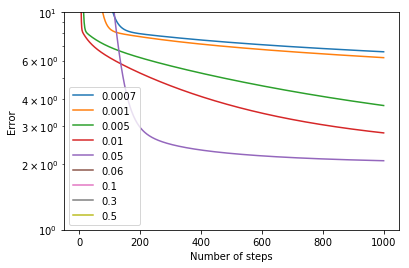

In [116]:
import matplotlib.pyplot as plt
step_sizes = np.array([.0007,.001,.005,.01,.05,.06,.1,.3,.5])
for m in step_sizes:
    _,loss_hist = batch_grad_descent(X_train,y_train,alpha = m)
    plt.plot(loss_hist,label = m)
plt.legend(loc = 'best')    
plt.xlabel("Number of steps")
plt.ylabel("Error")
plt.yscale('log', nonposy='clip')
plt.show()

As the graph shows that step size of 0.06, 0.1, 0.3, 0.5 are not converge. Therefore, when the step size is too large the erro start to diverge. 

## 2.5-2

In [117]:

###################################################
### Compute the gradient of Regularized Batch Gradient Descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    m = y.shape[0]
    grad = np.dot(X.T,2*np.dot(X,theta)-y)/m + 2*lambda_reg*theta
    return grad


# 2.5-3

In [118]:
###################################################
### Batch Gradient Descent with regularization term
def regularized_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        numIter - number of iterations to run

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_iter+1, num_features)
        loss_hist - the history of loss function without the regularization term, 1D numpy array.
    """
    (num_instances, num_features) = X.shape
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter + 1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_iter + 1) #Initialize loss_hist
    #TODO
    for i in range(num_iter):
        grad=compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)
        theta=theta-alpha*grad # regularization 
        theta_hist[i+1]=theta
        loss_hist[i+1]=compute_square_loss(X,y,theta)+ np.sum(theta**2)*lambda_reg
    return theta_hist, loss_hist
        

# 2.5-7

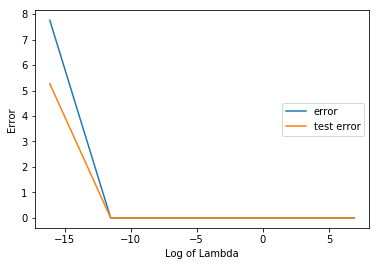

The minmum of error is: 0.0
The minmum of test error is: 0.0
The minimum of lambda is: 1e-05


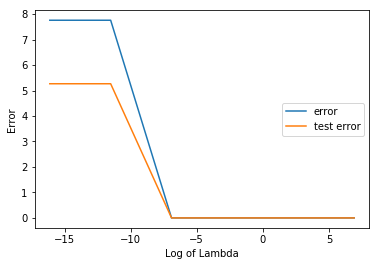

The minmum of error is: 0.0
The minmum of test error is: 0.0
The minimum of lambda is: 0.001


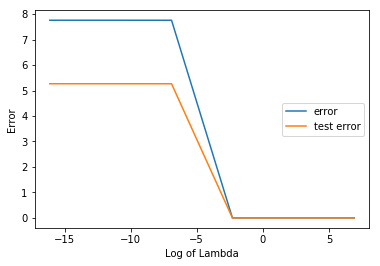

The minmum of error is: 0.0
The minmum of test error is: 0.0
The minimum of lambda is: 0.1


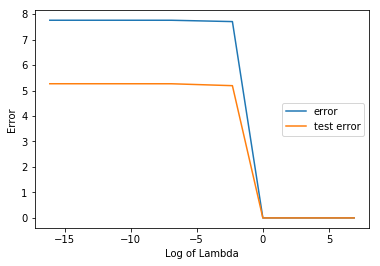

The minmum of error is: 0.0
The minmum of test error is: 0.0
The minimum of lambda is: 1.0


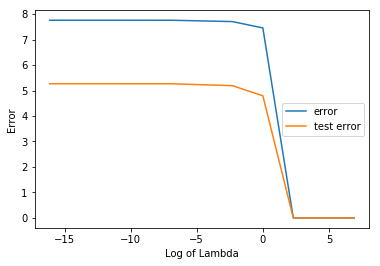

The minmum of error is: 0.0
The minmum of test error is: 0.0
The minimum of lambda is: 10.0


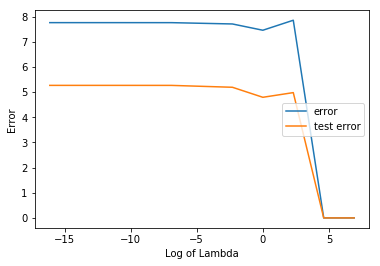

The minmum of error is: 0.0
The minmum of test error is: 0.0
The minimum of lambda is: 100.0


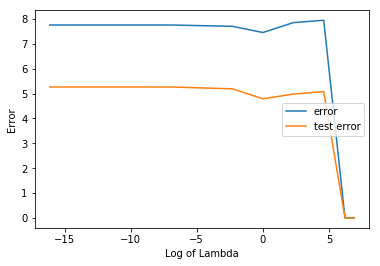

The minmum of error is: 0.0
The minmum of test error is: 0.0
The minimum of lambda is: 500.0


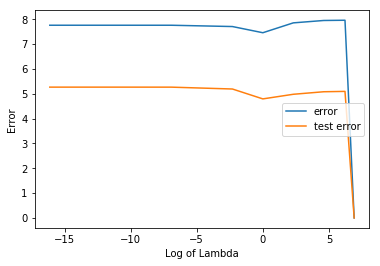

The minmum of error is: 0.0
The minmum of test error is: 0.0
The minimum of lambda is: 1000.0


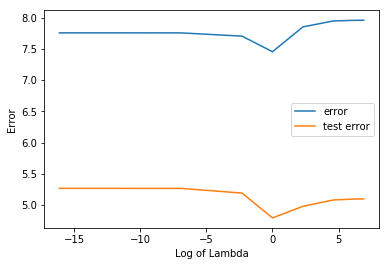

The minmum of error is: 7.45594341791
The minmum of test error is: 4.79209206595
The minimum of lambda is: 1.0


In [166]:
#############################################
## Visualization of Regularized Batch Gradient Descent
##X-axis: log(lambda_reg)
##Y-axis: square_loss
lambda_ = np.array([1e-7,1e-5,1e-3,1e-1,1,10,100,500,1000]) #primary array range
stepsize = 0.0002
error = np.zeros(lambda_.shape[0])
test_error = np.zeros(lambda_.shape[0]) # initialize two array of errors.

for m,n in enumerate(lambda_):
    theta, loss = regularized_grad_descent(X_train,y_train, alpha = stepsize,lambda_reg = n)
    error[m] = compute_square_loss(X_train,y_train, theta[-1])
    test_error[m] = compute_square_loss(X_test,y_test,theta[-1])
    plt.plot(np.log(lambda_),error, label = "error")
    plt.plot(np.log(lambda_),test_error, label = "test error")
    plt.legend(loc= 'right')
    plt.xlabel("Log of Lambda")
    plt.ylabel("Error")
    plt.show()
    print("The minmum of error is: " + str(error.min()))
    print("The minmum of test error is: " + str(test_error.min()))
    print("The minimum of lambda is: "+ str(lambda_[np.argmin(test_error)]))
    

# 2.6

In [147]:
#############################################
### Stochastic Gradient Descent

def stochastic_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter, num_instances, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_iter, num_instances)) #Initialize loss_hist
    #TODO
    if isinstance(alpha, float): # to see if the alpha is float or not.
        a =lambda x: 1 # set the function to a constant.
    elif isinstance(alpha, str): # to see if the alpha is a string type such as '1/t'
        if alpha == '1/t':
            a = lambda x: 1.0 / x # set it to 1/t
        if alpha == '1/sqrt(t)':
            a = lambda x: 1.0 / np.sqrt(x)  
        alpha = 0.1 #need to set alpha to 0.1 as a float type
    for i in range(num_iter):
        for j in range(num_instances):
            
            bias_l = np.dot(X[j],theta)-y[j]
            reg_l = lambda_reg * np.dot(theta.T, theta)
            
            theta_hist[i, j] = theta
            loss_hist[i, j] = compute_square_loss(X, y, theta)
            
            grad = 2*lambda_reg*theta+X[j]*bias_l
            nabla = alpha*a((j+1)*(i+1))
            theta = theta - nabla*grad
            
    return theta_hist, loss_hist



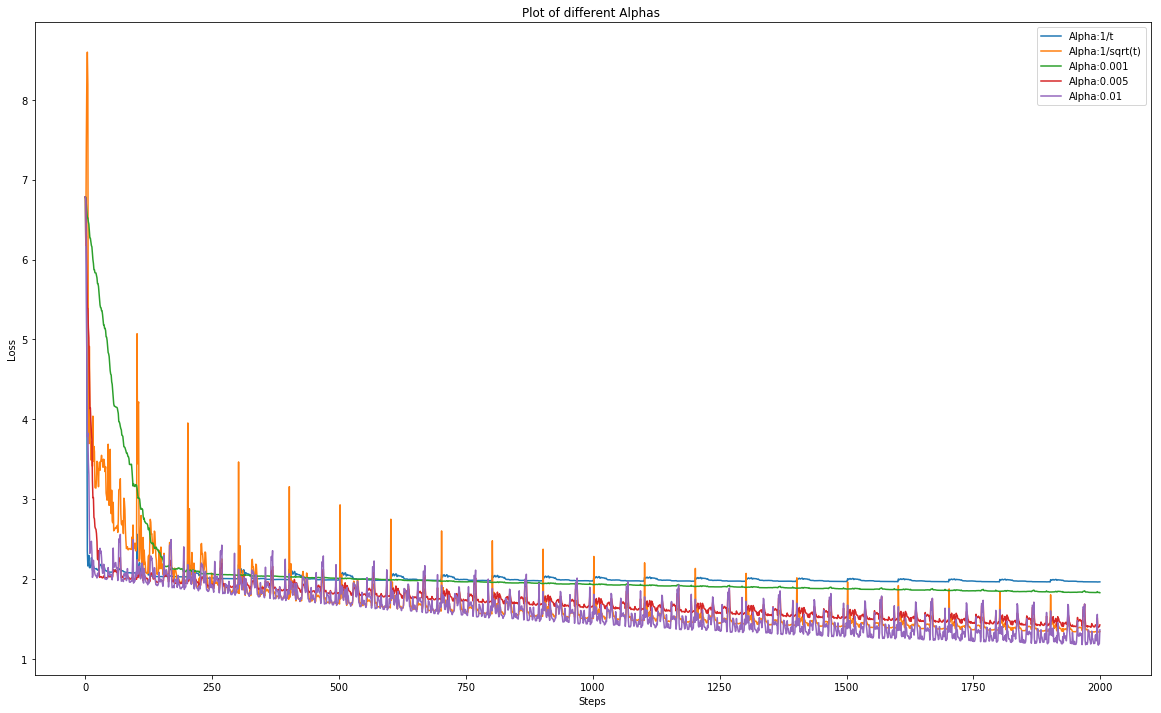

In [157]:
def SGD2(X,y):
    array_1 = ['1/t','1/sqrt(t)',0.001,0.005,0.01]
    plt.figure(figsize = (20,12)) 
    for alpha in array_1:
        theta,loss = stochastic_grad_descent(X,y,alpha,lambda_reg = 0.01, num_iter = 20)
        l= range(len(loss.reshape(-1)))
        plt.plot(l,np.log(loss.reshape(-1)),label= 'Alpha:'+str(alpha)) # log transformation
    plt.legend()
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title("Plot of different Alphas ")
    plt.show()
      
SGD2(X_train,y_train)

In [122]:
################################################
### Visualization that compares the convergence speed of batch
###and stochastic gradient descent for various approaches to step_size
##X-axis: Step number (for gradient descent) or Epoch (for SGD)
##Y-axis: log(objective_function_value) and/or objective_function_value

def main():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('data.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

    # TODO
    return X_train, X_test, y_train, y_test

if __name__ == "__main__":
    X_train, X_test, y_train, y_test = main()


loading the dataset
Split into Train and Test
Scaling all to [0, 1]
